<html><h1><center style="color:blue">Human Activity Recognition with Smartphones</center></h1></html>

## Business Objectives and Constraints

1) These days, in addition to Smartphones, we are also using Smart-Watches like Fitbit or Apple-Watch, which help us to track our health. They monitor our each activity throughout the day check how many calories we have burnt. How many hours have we slept. However, in addition to Accelerometer and Gyroscope, they also use Heart-Rate data to monitor our activity. Since, we only have Smartphone data so just by using Accelerometer and Gyroscope data we will monitor the activity of a person. This software can then be converted into an App which can be downloaded in Smartphone. Hence, a person who has Smartphone can monitor his/her health using this App.

2) The cost of a mis-classification can be very high.

3) No strict latency concerns.

<br> This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs,
Sitting, Standing or Laying.

30 participants(referred as subjects in this dataset) performed activities of daily living while carrying a waist-mounted 
smartphone. The phone was configured to record two implemented sensors (accelerometer and gyroscope). For these time series 
the directors of the underlying study performed feature generation and generated the dataset by moving a fixed-width window of
2.56s over the series. Since the windows had 50% overlap the resulting points are equally spaced (1.28s).This experiment 
was video recorded to label the data manually.

In [1]:
import numpy as np
import pandas as pd

# get the features from the file features.txt
features = list()
with open('features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


### Getting the  train data 

In [2]:
import pandas as pd

# Read data from text files into pandas dataframe
X_train = pd.read_csv('X_train.txt', sep='\s+', header=None)

# Assuming 'features' is a predefined list of column names
X_train.columns = [features]

# Add subject column to the dataframe
X_train['subject'] = pd.read_csv('subject_train.txt', header=None).squeeze("columns")

# Read y_train data
y_train = pd.read_csv('y_train.txt', names=['Activity']).squeeze("columns")

# Map activity labels
y_train_labels = y_train.map({
    1: 'WALKING', 
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING', 
    5: 'STANDING',
    6: 'LAYING'
})

# Combine all columns into a single dataframe
train = X_train.copy()
train['Activity'] = y_train
train['ActivityName'] = y_train_labels

# Display sample rows
train.sample(2)

tBodyAcc-mean()-X tBodyAcc-mean()-Y tBodyAcc-mean()-Z tBodyAcc-std()-X  \
2006          0.329251         -0.006105         -0.098936        -0.418007   
1587          0.387735          0.003477         -0.094965         0.192649   

     tBodyAcc-std()-Y tBodyAcc-std()-Z tBodyAcc-mad()-X tBodyAcc-mad()-Y  \
2006        -0.060558        -0.511021        -0.459537        -0.037316   
1587         0.069283        -0.065671         0.096366        -0.056286   

     tBodyAcc-mad()-Z tBodyAcc-max()-X  ... angle(tBodyAccMean,gravity)  \
2006        -0.473004        -0.231089  ...                   -0.556140   
1587        -0.158330         0.627576  ...                   -0.622002   

     angle(tBodyAccJerkMean),gravityMean) angle(tBodyGyroMean,gravityMean)  \
2006                            -0.206881                         0.576228   
1587                             0.500872                         0.447586   

     angle(tBodyGyroJerkMean,gravityMean) angle(X,gravityMean)  \
2006                             0.861342            -0.742595   
1587                            -0.160073            -0.879470   

     angle(Y,gravityMean) angle(Z,gravityMean) subject Activity  \
2006             0.238269            -0.095129      11        1   
1587             0.181366             0.023188       7        3   

            ActivityName  
2006             WALKING  
1587  WALKING_DOWNSTAIRS  

[2 rows x 564 columns]

In [3]:
train.shape

(7352, 564)

### Getting the  train data 

In [4]:
import pandas as pd

# Read test data from text files into pandas dataframe
X_test = pd.read_csv('X_test.txt', sep='\s+', header=None)

# Ensure 'features' is a valid list of column names before assigning
X_test.columns = features  # Remove brackets to avoid list nesting issue

# Add subject column to the dataframe
X_test['subject'] = pd.read_csv('subject_test.txt', header=None).squeeze("columns")

# Get y labels from the txt file
y_test = pd.read_csv('y_test.txt', names=['Activity']).squeeze("columns")

# Map activity labels
y_test_labels = y_test.map({
    1: 'WALKING', 
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING', 
    5: 'STANDING',
    6: 'LAYING'
})

# Combine all columns into a single dataframe
test = X_test.copy()
test['Activity'] = y_test
test['ActivityName'] = y_test_labels

# Display sample rows
test.sample(2)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
2839           0.298541          -0.016704          -0.113298   
2067           0.281454          -0.011558          -0.098318   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
2839         -0.988111         -0.993280         -0.989546         -0.988328   
2067         -0.996585         -0.986204         -0.980908         -0.996877   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
2839         -0.993448         -0.989785         -0.927707  ...   
2067         -0.987862         -0.980534         -0.940633  ...   

      angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
2839                     0.082067                              0.510579   
2067                     0.085140                              0.259139   

      angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
2839                          0.637627                             -0.468857   
2067                          0.116009                              0.235568   

      angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  \
2839              0.485731             -0.450723             -0.550362   
2067             -0.695710              0.243314              0.174339   

      subject  Activity  ActivityName  
2839       24         6        LAYING  
2067       18         5      STANDING  

[2 rows x 564 columns]

In [5]:
train.shape

(7352, 564)

## Time to Data Cleaning

### 1. Check for Duplicates

In [6]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

C:\Users\sanju\AppData\Local\Temp\ipykernel_31300\408555551.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print('No of duplicates in train: {}'.format(sum(train.duplicated())))


No of duplicates in train: 0
No of duplicates in test : 0


### 2. Checking for NaN/null values

In [7]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


### 3. Save this dataframe in a csv files

In [8]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

## Exploratory Data Analysis

### Obtain the train and test data

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


### All the feature name with lots of unnecessary singhs:  Changing feature names 

In [10]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

In [11]:
columns = train.columns

# Removing special characters ((), -, ,)
columns = columns.str.replace('[()]', '', regex=True)
columns = columns.str.replace('[-]', '', regex=True)
columns = columns.str.replace('[,]', '', regex=True)

# Assigning the cleaned column names back
train.columns = columns
test.columns = columns

print(test.columns)  # Check if the column names are now cleaned

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)


### 1. investigate participants activity durations.
- Since the dataset has been created in a scientific environment nearly equal preconditions for the participants can be assumed. Let us investigate their activity durations.

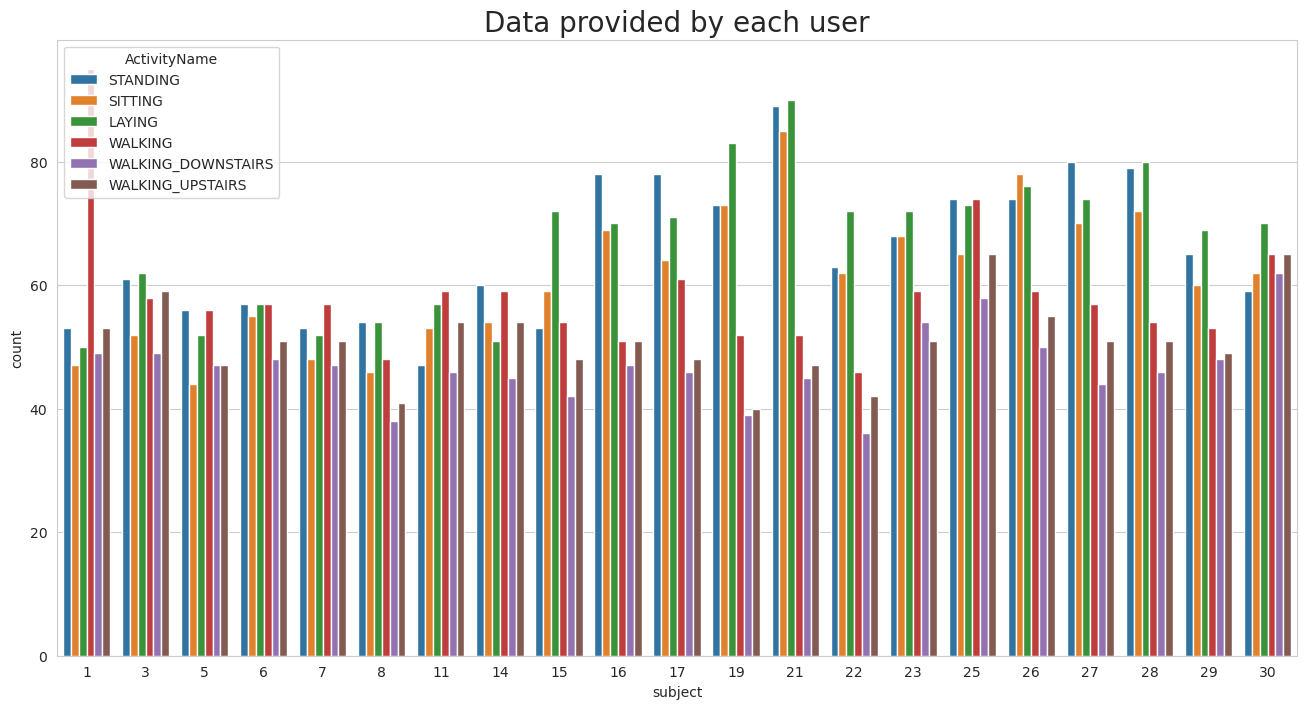

In [12]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

- Nearly all participants have more data for walking upstairs than downstairs. Assuming an equal number of up- and down-walks the participants need longer walking upstairs.

### How Are The ActivityName Distributed?

In [13]:
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


# Plotting data
label_counts = train['ActivityName'].value_counts()

# Get colors
n = label_counts.shape[0]
colormap = plt.get_cmap('viridis')
colors = [mlt.colors.to_hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Create plot
data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Smartphone ActivityName Distribution',
                   xaxis = dict(title = 'ActivityName'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
fig.show()
#iplot(fig)

- Although there are fluctuations in the label counts, the labels are quite equally distributed.

- Assuming the participants had to walk the same number of stairs upwards as well as downwards and knowing the smartphones had a constant sampling rate, there should be the same amount of datapoints for walking upstairs and downstairs.
- Disregarding the possibility of flawed data, the participants seem to walk roughly 10% faster downwards.

### 2. Featuring Engineering from Domain Knowledge 

+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.



### 3. Stationary and Moving activities are completely different

C:\Users\sanju\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\sanju\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\sanju\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarn

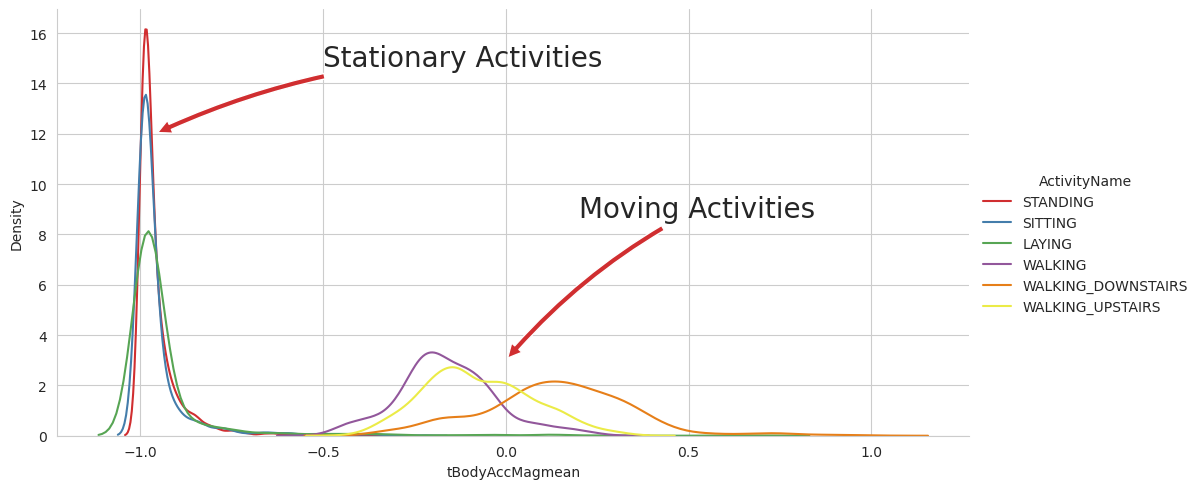

In [24]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=5,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.960,12), xytext=(-0.5, 15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

- As aspected from most real world data, when participants are moving the data is normally distributed with some long tail.

C:\Users\sanju\AppData\Local\Temp\ipykernel_25968\1112189619.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\sanju\AppData\Local\Temp\ipykernel_25968\1112189619.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\sanju\AppData\Local\Temp\ipykernel_25968\1112189619.py:14: UserWarn

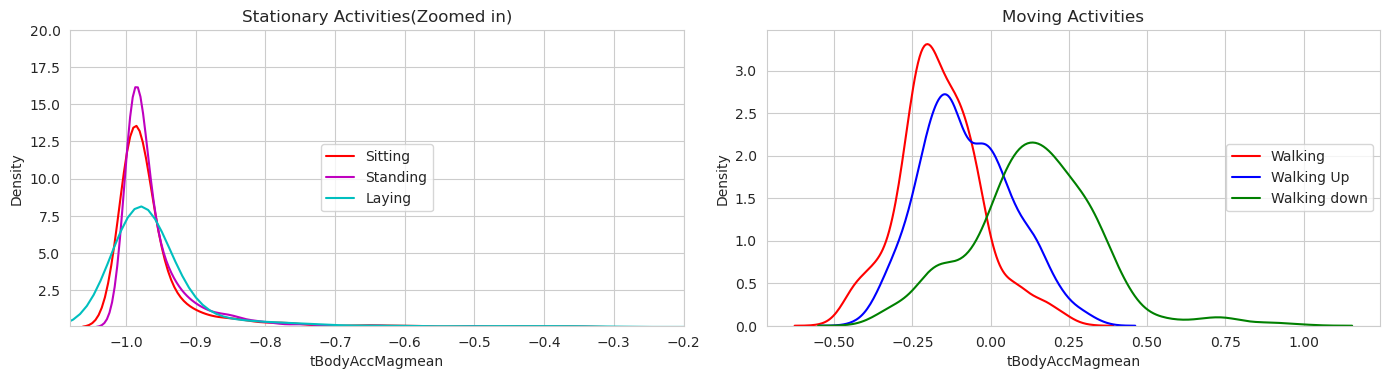

In [25]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.08, -0.2, 0.1, 20])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

- We can see clearly here, the distribuation of Stationary Activities and Moving Activities.

### 4. Magnitude of an acceleration can saperate it well

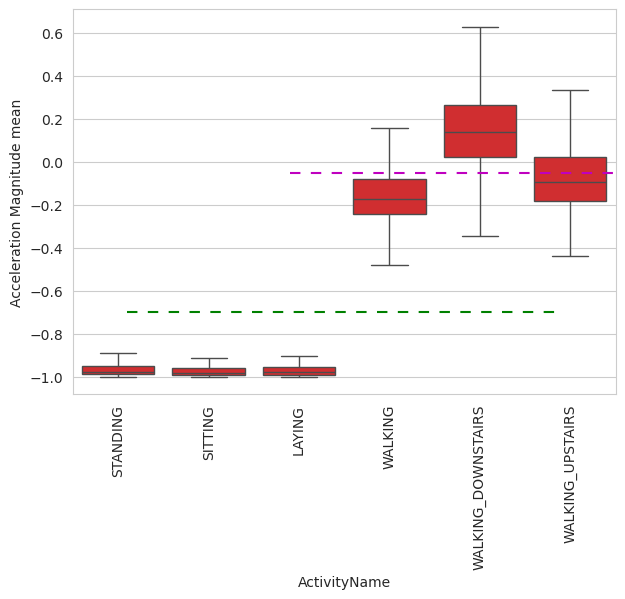

In [26]:
plt.figure(figsize=(7,5))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 5. Position of GravityAccelerationComponants also matters 

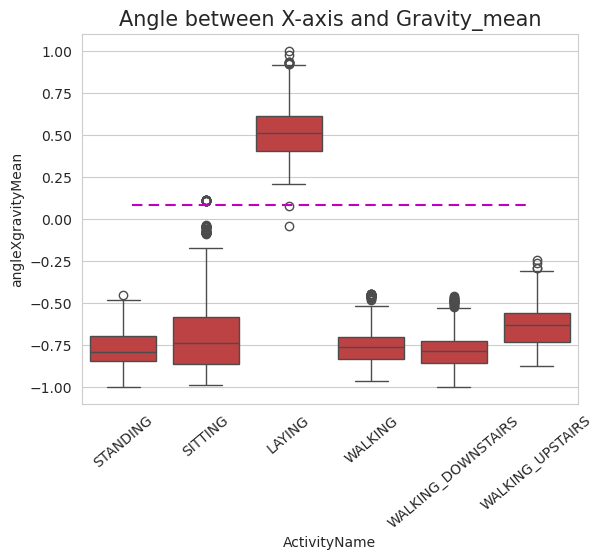

In [27]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

- If angleX,gravityMean > 0 then Activity is Laying.
- We can classify all datapoints belonging to Laying activity with just a single if else statement.

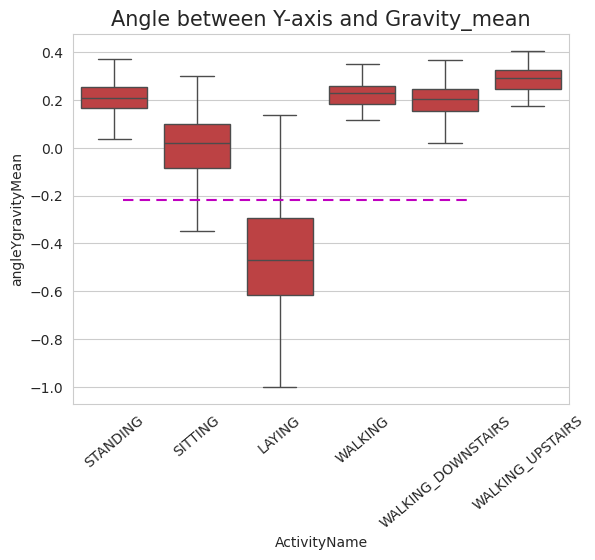

In [28]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

## Apply t-sne on the data 
#### Are The Activities Separable?
- The dataset is geared towards classifying the activity of the participant. Let us investigate the separability of the classes.

In [29]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# performs t-sne with different perplexity values and their repective plots..

def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.020s...
[t-SNE] Computed neighbors for 7352 samples in 0.542s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.004s
[t-SNE] Iteration 50: error = 119.3283005, gradient norm = 0.0441333 (50 iterations in 4.508s)
[t-SNE] Iteration 100: error = 105.1608658, gradient norm = 0.0220755 (50 iterations in 

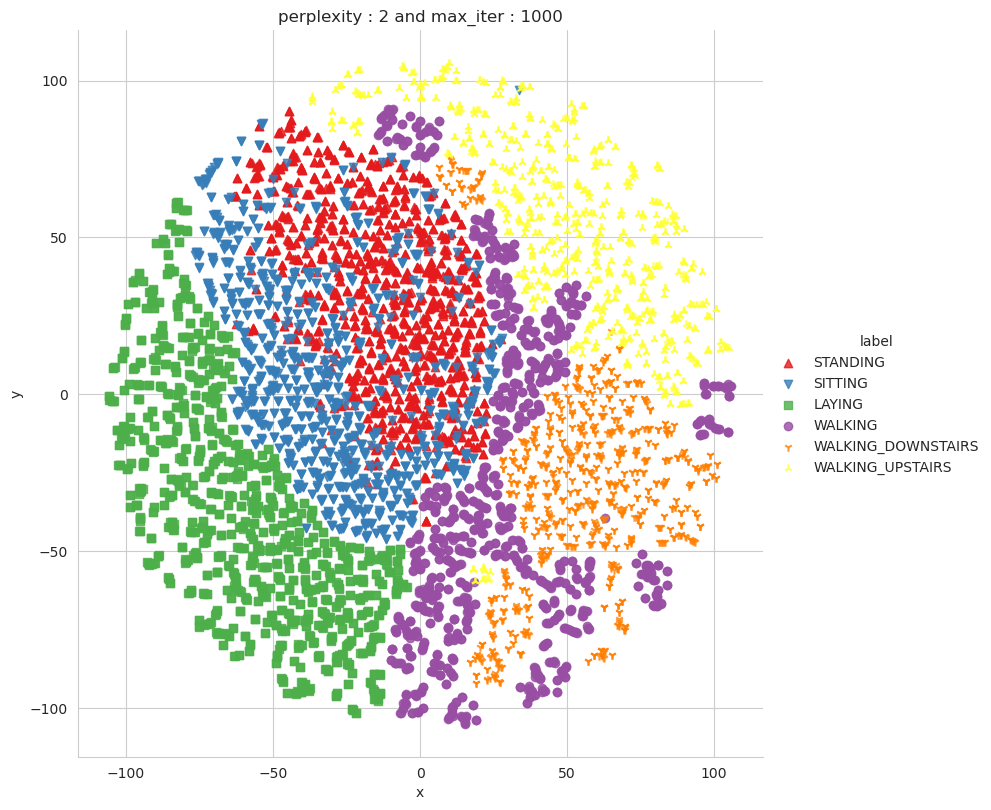

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.017s...
[t-SNE] Computed neighbors for 7352 samples in 0.439s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.030s
[t-SNE] Iteration 50: error = 107.1307678, gradient norm = 0.0388322 (50 iterations in 4.541s)
[t-SNE] Iteration 100: error = 95.6967239, gradient norm = 0.0139837 (50 iteration

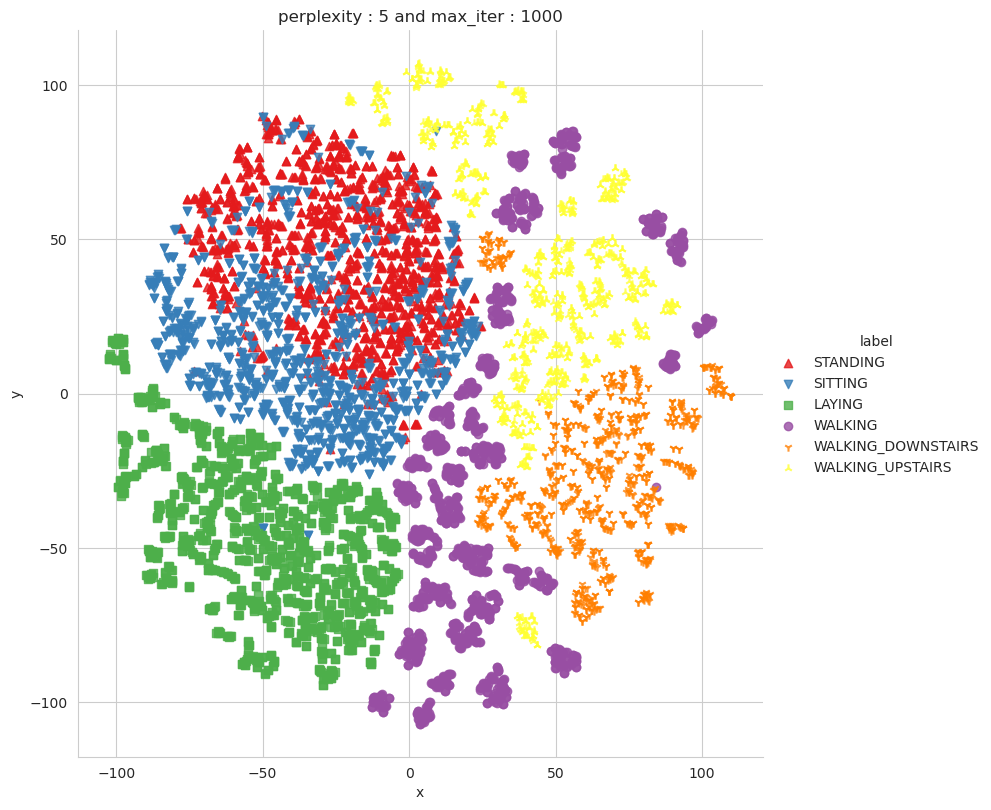

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.020s...
[t-SNE] Computed neighbors for 7352 samples in 0.486s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.067s
[t-SNE] Iteration 50: error = 97.8900070, gradient norm = 0.0354127 (50 iterations in 4.981s)
[t-SNE] Iteration 100: error = 88.9237976, gradient norm = 0.0104172 (50 iteration

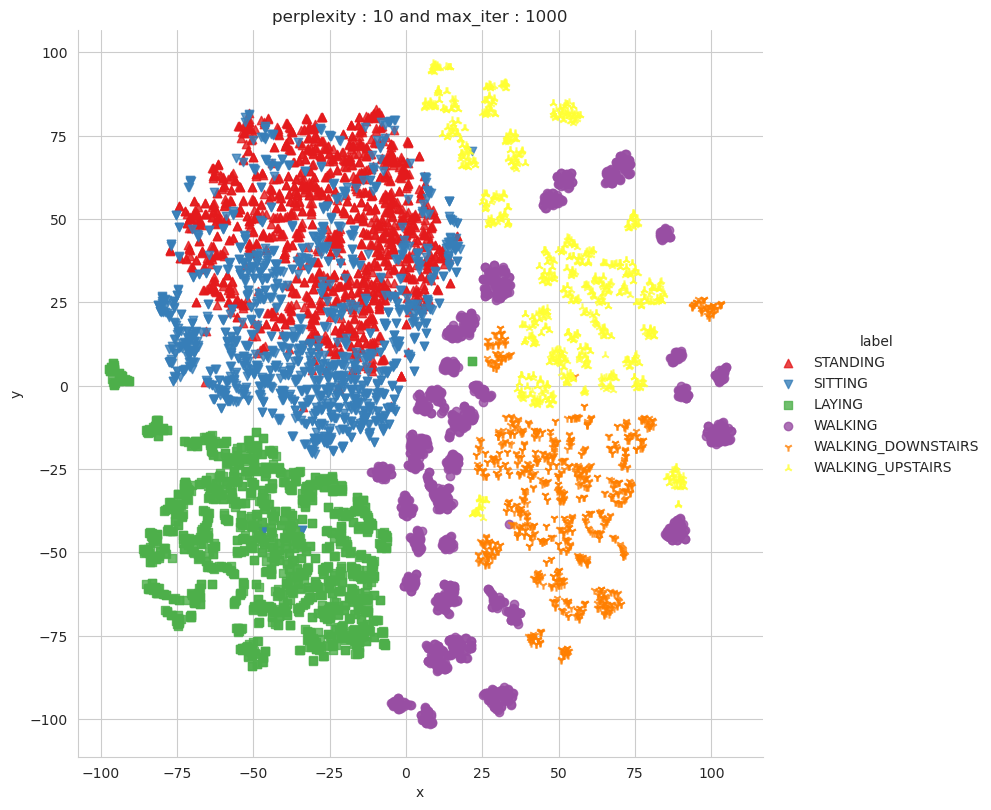

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.026s...
[t-SNE] Computed neighbors for 7352 samples in 0.469s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.114s
[t-SNE] Iteration 50: error = 89.2824249, gradient norm = 0.0296701 (50 iterations in 5.416s)
[t-SNE] Iteration 100: error = 82.9646606, gradient norm = 0.0080279 (50 iteration

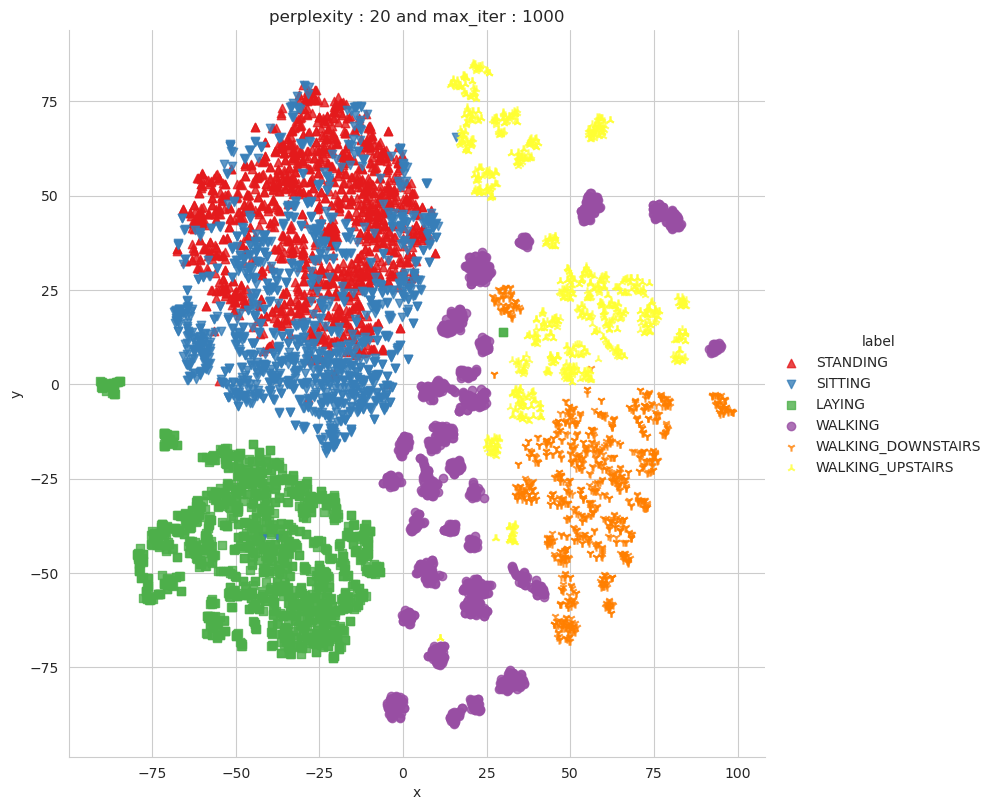

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.017s...
[t-SNE] Computed neighbors for 7352 samples in 0.524s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.311s
[t-SNE] Iteration 50: error = 78.8173447, gradient norm = 0.0243450 (50 iterations in 8.304s)
[t-SNE] Iteration 100: error = 75.2279739, gradient norm = 0.0054254 (50 iteratio

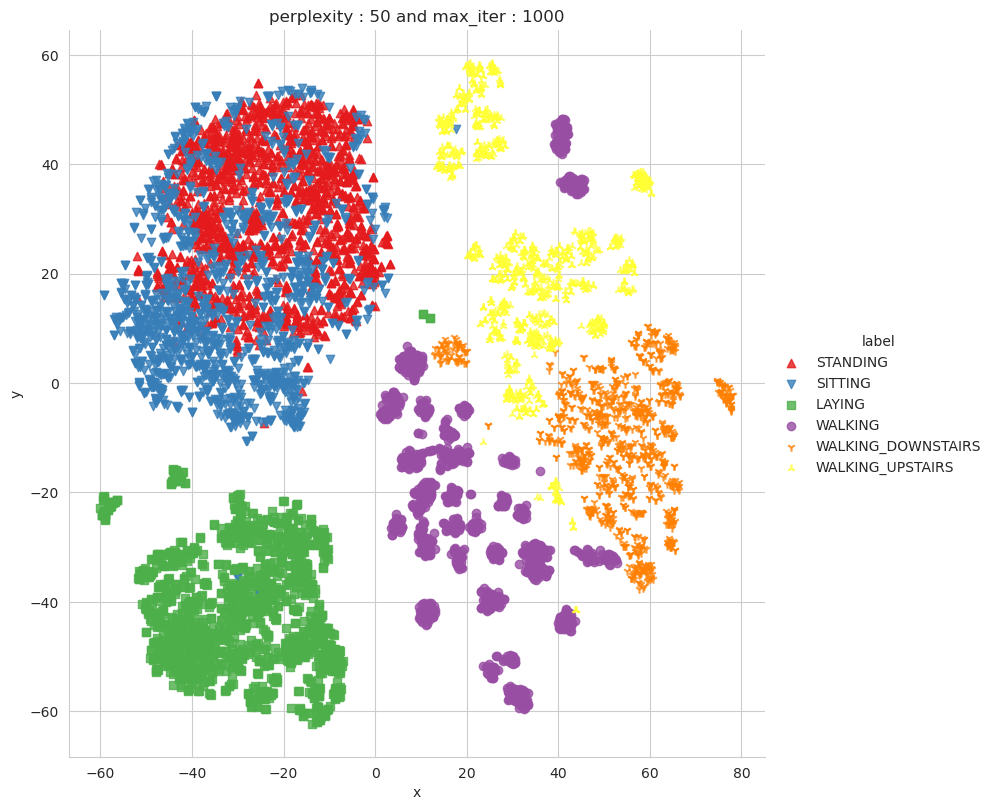

Done


In [31]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

- We can clearly see the TSNE cluster, All the Activity are clean seperate except "Standing" and "Sitting". 